In [23]:
import os

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
REPORT_PATH = "./report"

random_tests = ["1711446488", "1711447141", "1711447795", "1711448448", "1711449102"]
carbon_intensity_tests = ["1711463951", "1711464604", "1711465257", "1711465911", "1711467281"]

In [42]:
random_dfs = dict()

for i, folder in enumerate(random_tests):
    folder_path = os.path.join(REPORT_PATH, folder)
    file_path = os.path.join(folder_path, "carbon-report-4000rps-15msz.csv")
    df = pd.read_csv(file_path)
    random_dfs[i] = df

In [43]:
random_dfs[0].head()

,timestamp,carbon_intensity_gco2_kwh,energy_use_joules,carbon_emission_gco2,cpu_ratio_pct,mem_ratio_pct
0,1711446491,549.25,90.256606,0.013770,0.8275,2.651512
1,1711446503,549.25,158.157784,0.024130,0.8275,2.651512
2,1711446514,549.25,157.859172,0.024084,26.6200,2.666379
3,1711446525,549.25,157.779387,0.024072,26.6200,2.666379
4,1711446536,549.25,159.511917,0.024337,26.6200,2.666379


In [44]:
carbon_intensity_dfs = dict()

for i, folder in enumerate(carbon_intensity_tests):
    folder_path = os.path.join(REPORT_PATH, folder)
    file_path = os.path.join(folder_path, "carbon-report-4000rps-15msz.csv")
    df = pd.read_csv(file_path)
    carbon_intensity_dfs[i] = df

In [45]:
def plot_carbon_report(
        creps: dict[int, pd.DataFrame], 
        y_series: str,
        y_label: str = "Unit",
        title: str = "Carbon Report",
):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    x_data = list(creps.values())[0]['timestamp']
    x_data = x_data - x_data.min()
    
    for rps, df in creps.items():
        ax.plot(x_data, df[y_series], linewidth=1, label=f"{rps}")
    
    ax.set_title(title)
    ax.set_xlabel("Seconds since start")
    ax.set_ylabel(y_label)
    
    ax.legend(title="RPS")
    
    plt.show()

In [46]:
Y_SERIES_LABELS = {
    "energy_use_joules": "Joules",
    "carbon_intensity_gco2_kwh": "gCO2/kWH",
    "carbon_emission_gco2": "gCO2",
    "latency_ms": "millisecond",
}

In [47]:
Y_SERIES_TITLES = {
    "energy_use_joules": "Energy use",
    "carbon_intensity_gco2_kwh": "Carbon intensity",
    "carbon_emission_gco2": "Carbon emission",
    "latency_ms": "Latency",
}

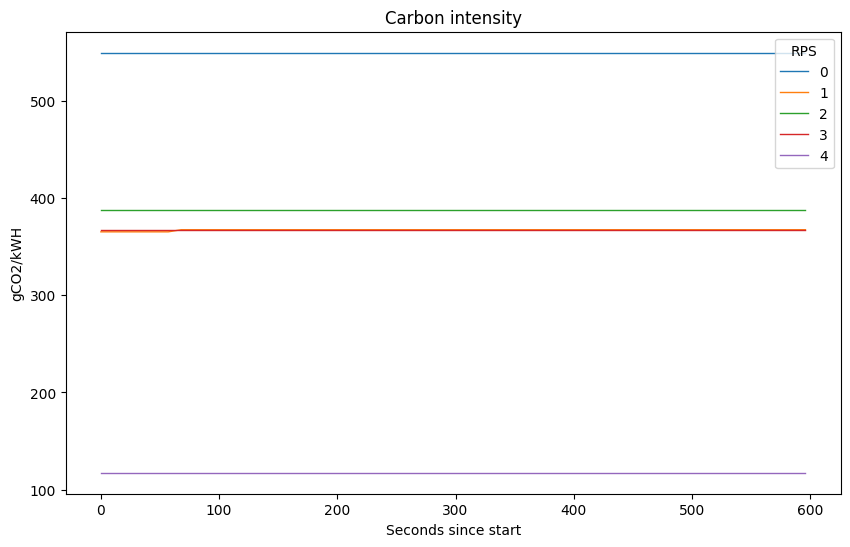

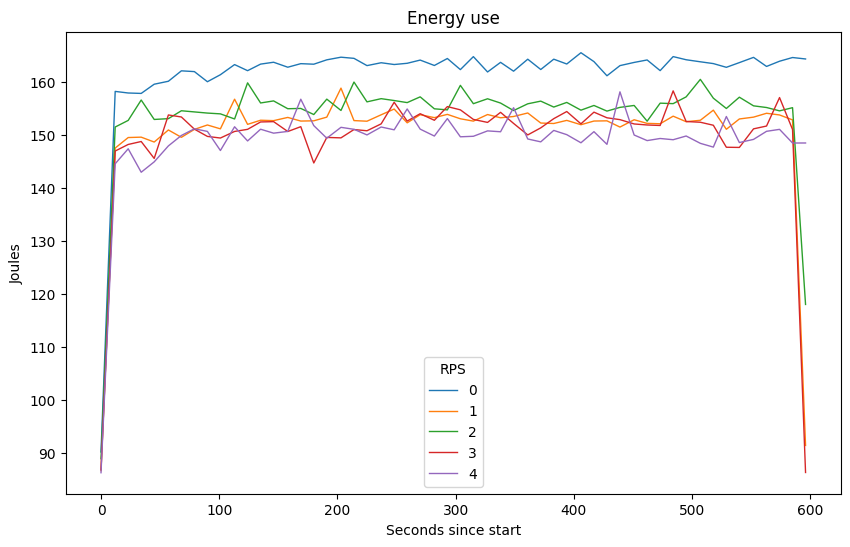

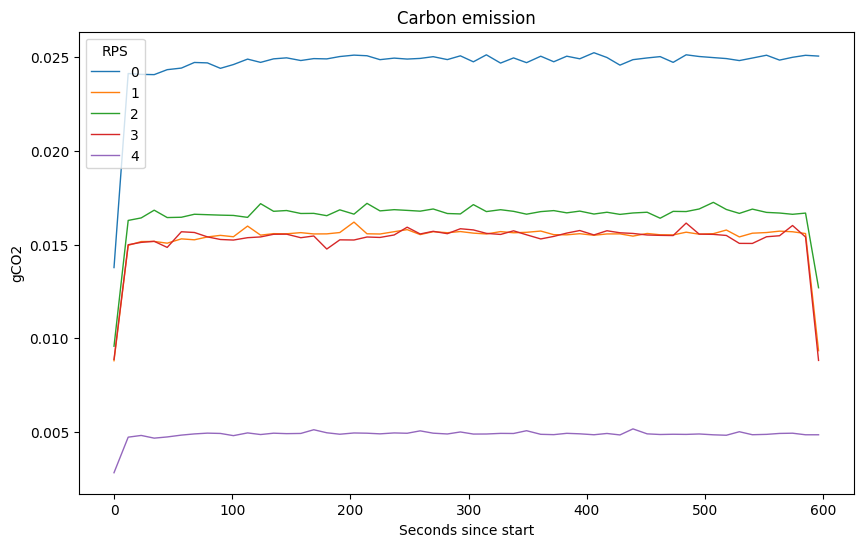

In [48]:
plot_carbon_report(random_dfs, y_series="carbon_intensity_gco2_kwh", y_label=Y_SERIES_LABELS["carbon_intensity_gco2_kwh"], title=Y_SERIES_TITLES["carbon_intensity_gco2_kwh"])
plot_carbon_report(random_dfs, y_series="energy_use_joules", y_label=Y_SERIES_LABELS["energy_use_joules"], title=Y_SERIES_TITLES["energy_use_joules"])
plot_carbon_report(random_dfs, y_series="carbon_emission_gco2", y_label=Y_SERIES_LABELS["carbon_emission_gco2"], title=Y_SERIES_TITLES["carbon_emission_gco2"])

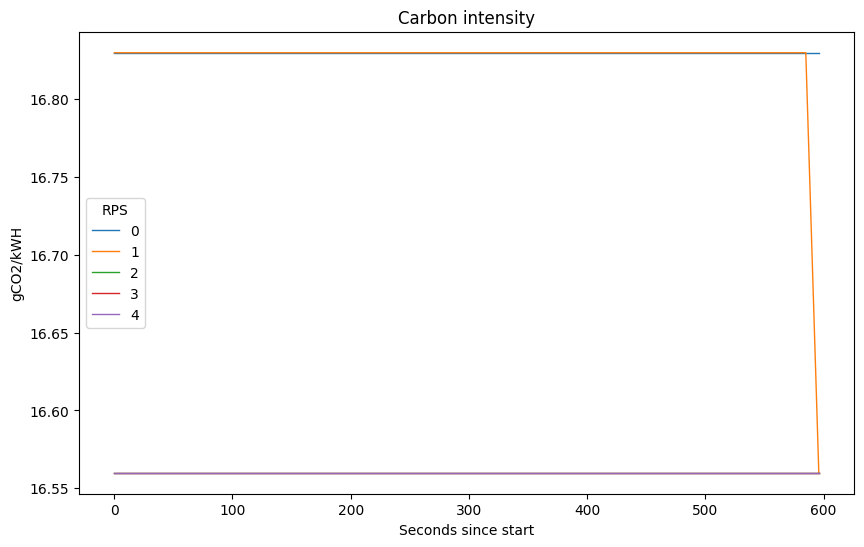

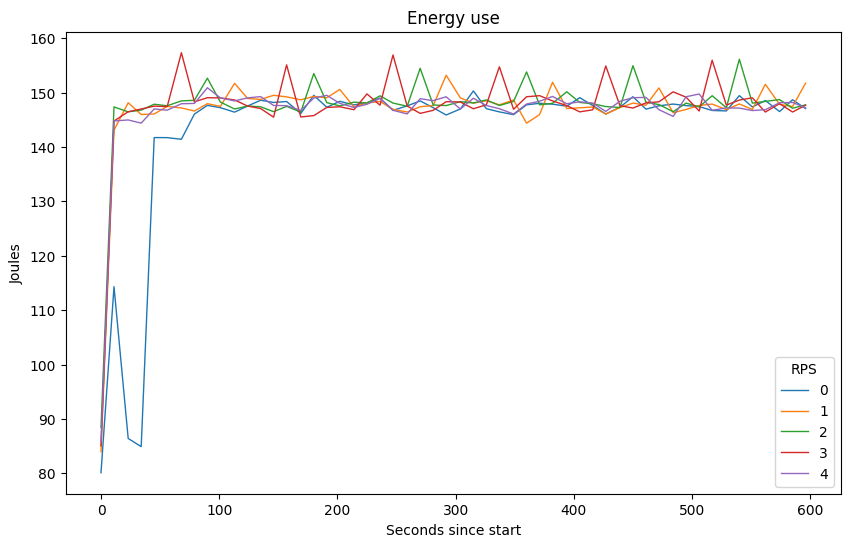

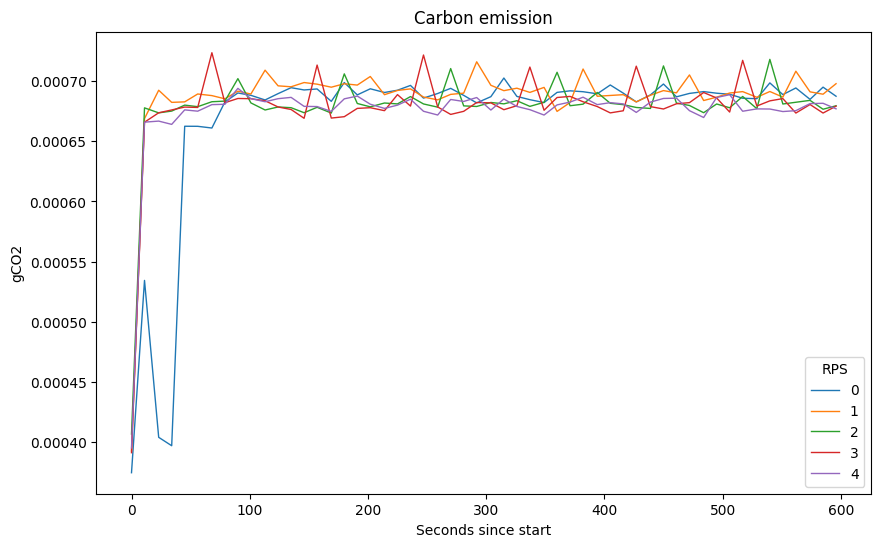

In [49]:
plot_carbon_report(carbon_intensity_dfs, y_series="carbon_intensity_gco2_kwh", y_label=Y_SERIES_LABELS["carbon_intensity_gco2_kwh"], title=Y_SERIES_TITLES["carbon_intensity_gco2_kwh"])
plot_carbon_report(carbon_intensity_dfs, y_series="energy_use_joules", y_label=Y_SERIES_LABELS["energy_use_joules"], title=Y_SERIES_TITLES["energy_use_joules"])
plot_carbon_report(carbon_intensity_dfs, y_series="carbon_emission_gco2", y_label=Y_SERIES_LABELS["carbon_emission_gco2"], title=Y_SERIES_TITLES["carbon_emission_gco2"])

In [50]:
def plot_carbon_report(
        df: pd.DataFrame,
        y_label: str = "Unit",
        title: str = "Carbon Report",
):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    plt.boxplot(df, patch_artist=True)
    
    ax.set_title(title)
    ax.set_xlabel("Seconds since start")
    ax.set_ylabel(y_label)
    
    plt.xticks(ticks=np.arange(1, 2), labels=['Random', 'Carbon intensity'])
    
    ax.legend(title=title)
    
    plt.show()

In [ ]:
bp_eu_df = 